In [128]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np
# import ParameterGrid
from sklearn.model_selection import ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl


In [129]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')].copy()
sympdf.shape

(6031, 162)

In [130]:
groups_df = pd.read_csv('output/symptom_groups.csv')


In [131]:
groups_df

,symptom,group
0,Symptom_Memory_short,Memory
1,Symptom_Memory_long,Memory
2,Symptom_Memory_no_new_memories,Memory
3,Symptom_Memory_forget_tasks,Memory
4,Symptom_Memory_other,Memory
...,...,...
156,Symptom_Neuralgia,Misc
157,Symptom_Pain_burning_chest,Misc
158,Symptom_Eye_Vision_pink_eye,Misc
159,Symptom_Eye_Vision_bloodshot_eyes,Misc


In [132]:
clus = pd.read_csv("../clusterings/tessa/cluster_13_111023.csv", index_col=0)
clus_leo = pd.read_csv("../clusterings/leo/final_aencoder_hdbscan_6.csv", index_col=0)
clus_chris = pd.read_csv("../clusterings/chris/lowdim_spectral_ensemble_50_kmeans_joint_criterion_alpha_0.5_n_clusters_8.csv", index_col=0)

In [133]:
ensemble = pd.concat([clus['cluster'].rename("LCA"), clus_leo['cluster'].rename("Leo"), clus_chris['cluster'].rename("Chris")], axis=1)

In [134]:
sympdf['LCA'] = clus['cluster'].values
sympdf['Leo'] = clus_leo['cluster'].values
sympdf['Chris'] = clus_chris['cluster'].values

In [135]:
avg_scores_by_grouping = {}
def make_avg_scores_by_grouping(sympdf = sympdf, clustercol = 'cluster', groups_df=groups_df):
    for grouping in groups_df.group.unique():
        # calculat the average score for each symptom in the group for each cluster in 'cluster'
        keepcols = groups_df.loc[groups_df.group == grouping, 'symptom'].tolist()
        #print(keepcols)
        keepcols.append(clustercol)
        a = sympdf.loc[:, keepcols]
        avg = a.groupby(clustercol).mean()
        avg_scores_by_grouping[grouping] = avg.mean(axis=1)
        #avg = sympdf.loc[:, sympdf.columns.str.startswith(grouping)].groupby(clus).mean()
    return(pd.DataFrame(avg_scores_by_grouping))


In [136]:
tessadf = make_avg_scores_by_grouping(clustercol = "LCA")

In [137]:
chrisdf = make_avg_scores_by_grouping(clustercol="Chris")

In [138]:
leodf = make_avg_scores_by_grouping(clustercol="Leo")

<Axes: xlabel='LCA'>

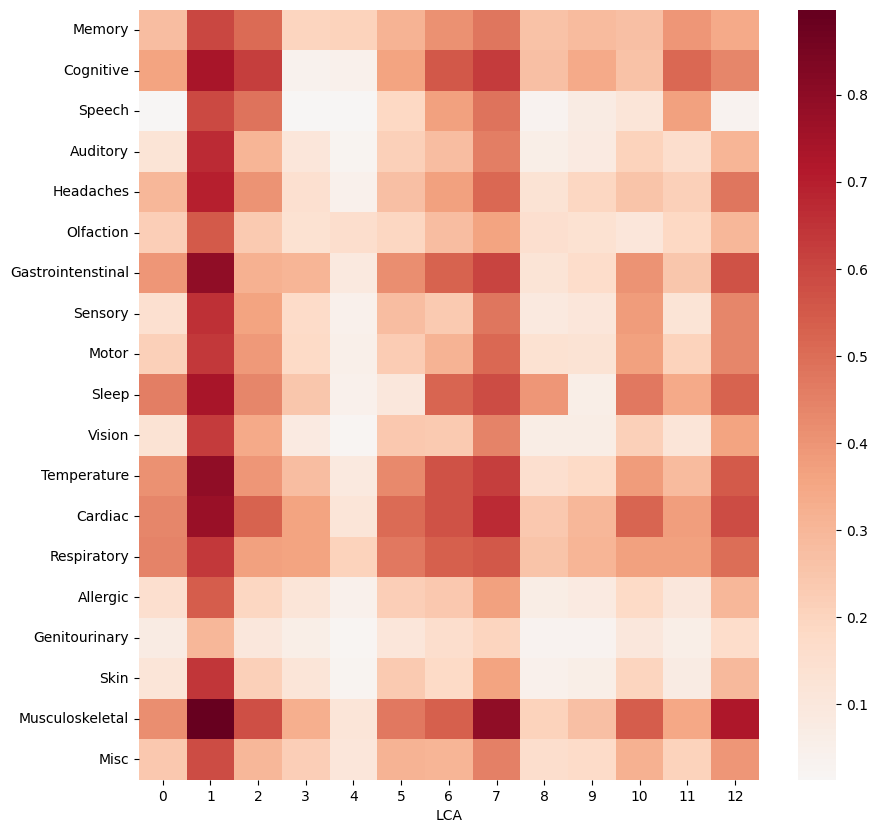

In [139]:
# plot avgdf as heatmap
plt.figure(figsize=(10,10))
sns.heatmap(tessadf.transpose(), cmap='RdBu_r', center=0)

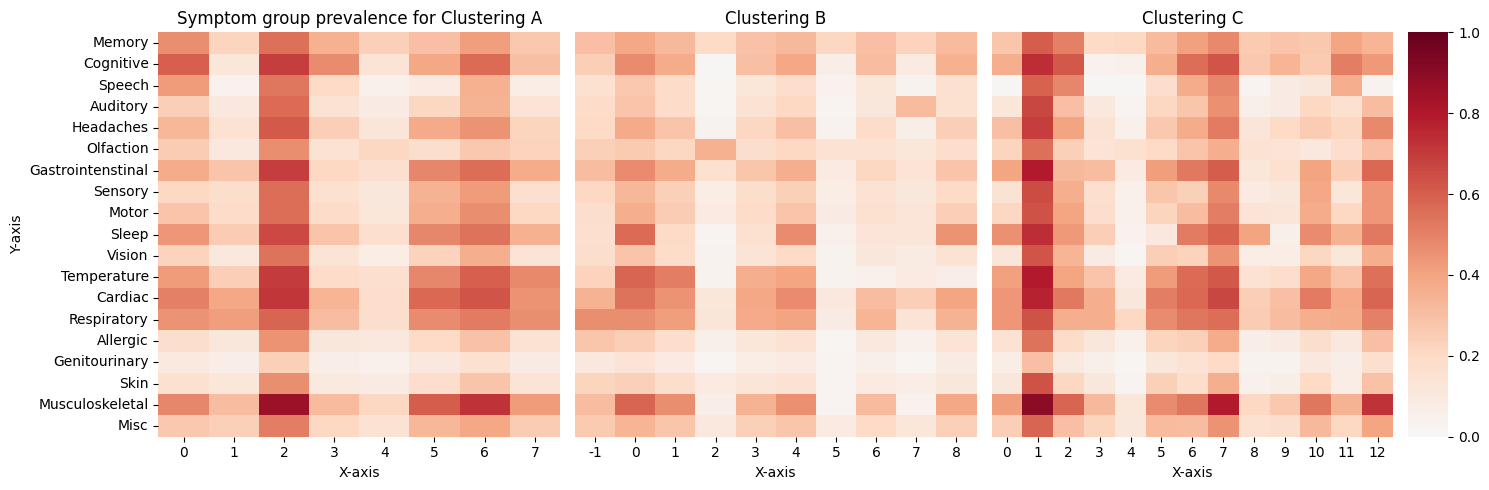

<Figure size 640x480 with 0 Axes>

In [140]:
# Generate some example data
data1 = chrisdf.T
data2 = leodf.T
data3 = tessadf.T

cmap = "RdBu_r"
# Create a figure and a 1x4 grid of subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})
# Plot the first heatmap using Seaborn
sns.heatmap(data1, cmap=cmap, ax=axs[0], center = 0, cbar=False, vmin=0, vmax=1)
axs[0].set_title('Symptom group prevalence for Clustering A')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')

# Plot the second heatmap using Seaborn
sns.heatmap(data2, cmap=cmap, ax=axs[1],center = 0 , cbar=False, vmin=0, vmax=1)
axs[1].set_title('Clustering B')
axs[1].set_xlabel('X-axis')
axs[1].set_yticks([])  # Remove y-axis ticks for shared y-axis

# Plot the third heatmap using Seaborn
sns.heatmap(data3, cmap=cmap, ax=axs[2], center=0, cbar_ax=axs[3], vmin=0, vmax=1)
axs[2].set_title('Clustering C')
axs[2].set_xlabel('X-axis')
axs[2].set_yticks([])  # Remove y-axis ticks for shared y-axis

# Adjust layout
plt.tight_layout()

plt.show()

plt.savefig('figs/combined_group_prevalence_scaled.pdf')

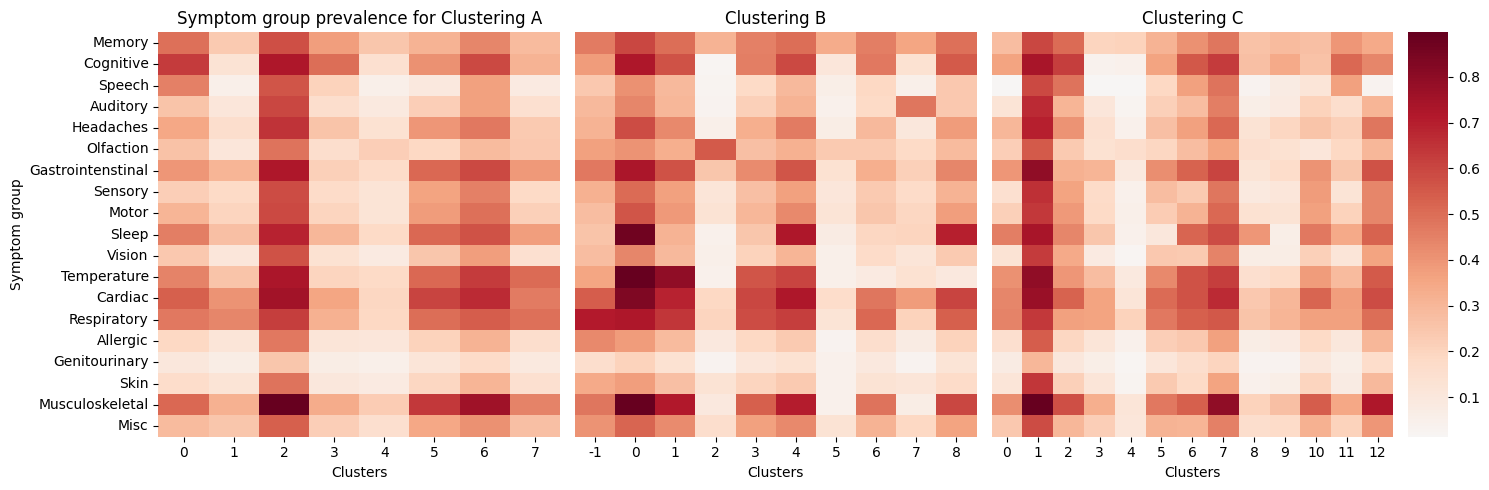

<Figure size 640x480 with 0 Axes>

In [141]:
# Generate some example data
data1 = chrisdf.T
data2 = leodf.T
data3 = tessadf.T

cmap = "RdBu_r"
# Create a figure and a 1x4 grid of subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})
# Plot the first heatmap using Seaborn
sns.heatmap(data1, cmap=cmap, ax=axs[0], center = 0, cbar=False)
axs[0].set_title('Symptom group prevalence for Clustering A')
axs[0].set_xlabel('Clusters')
axs[0].set_ylabel('Symptom group')

# Plot the second heatmap using Seaborn
sns.heatmap(data2, cmap=cmap, ax=axs[1],center = 0 , cbar=False)
axs[1].set_title('Clustering B')
axs[1].set_xlabel('Clusters')
axs[1].set_yticks([])  # Remove y-axis ticks for shared y-axis

# Plot the third heatmap using Seaborn
sns.heatmap(data3, cmap=cmap, ax=axs[2], center=0, cbar_ax=axs[3])
axs[2].set_title('Clustering C')
axs[2].set_xlabel('Clusters')
axs[2].set_yticks([])  # Remove y-axis ticks for shared y-axis

# Adjust layout
plt.tight_layout()

plt.show()

plt.savefig('figs/combined_group_prevalence.pdf')

In [21]:
# average symptom score for patients in each cluster

sympdf.groupby('cluster').mean().T.to_csv("output/stepmix_aggregate_010524_symptom_avgs.csv")

In [22]:
pd.DataFrame(avg_scores_by_grouping).T.to_csv("output/stepmix_aggregate_010524_grouped_symptom_avgs.csv")

In [ ]:
# only really meaningful thing is that cluster 5 is almost all cluster 4 in the bigger one 
# which seems not super useful...

full
8    1012
0     808
5     765
3     722
6     711
2     651
4     504
1     483
7     375
Name: count, dtype: int64

In [25]:
clusavgs = sympdf.groupby('cluster').mean()

In [28]:
clusavgs= clusavgs.T 


In [42]:
clusavgs.sub(clusavgs.mean(axis=1),axis=0 ).to_csv("output/stepmix_aggregate_010524_unusual_symptoms.csv")

In [40]:
clusavgs.iloc[0,].mean()

0.9268040215128701

In [41]:
clusavgs.iloc[0,]

cluster
1     0.945055
2     0.872527
3     0.877155
4     0.974122
5     0.911232
6     0.891403
7     0.939297
8     0.935860
9     0.900442
10    0.925620
11    0.933333
12    0.983713
13    0.958692
Name: Symptom_Memory_short, dtype: float64

In [48]:
groups_df.group.unique()


array(['Memory', 'Cognitive', 'Speech', 'Auditory', 'Headaches',
       'Olfaction', 'Gastrointenstinal', 'Sensory', 'Motor', 'Sleep',
       'Vision', 'Temperature', 'Cardiac', 'Respiratory', 'Allergic',
       'Genitourinary', 'Skin', 'Musculoskeletal', 'Misc'], dtype=object)

In [ ]:
plotdf['clus_combined'] = 

,tsne_1,tsne_2,clusters
3,47.933407,-21.286636,8
5,-27.814507,35.845314,11
6,15.681274,33.435112,10
8,23.977867,19.588600,0
9,12.690216,43.207115,10
...,...,...,...
14158,-53.188107,2.973292,2
14161,-16.414850,46.043713,11
14163,-46.459091,-19.754349,6
14166,46.536556,-26.674017,8
